In [1]:
# Import needed packages
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
import requests
import shutil
from io import open
import os
from PIL import Image
import json

""" Instantiate model, this downloads tje 4.7 mb  squzzene the first time it is called.
To use with your own model, re-define your trained networks ad load weights as below

checkpoint = torch.load("pathtosavemodel")
model = SimpleNet(num_classes=10)


model.load_state_dict(checkpoint)
model.eval()
"""

#squeezenet_model_path = "/Users/juanzinser/.torch/models/squeezenet1_1-f364aa15.pth"
model = squeezenet1_1(pretrained=True)
#model = squeezenet1_1()
#checkpoint = torch.load(squeezenet_model_path)
#model.load_state_dict(checkpoint)

model.eval()


def predict_image(image_path):
    print("Prediction in progress")
    image = Image.open(image_path)

    # Define transformations for the image, should (note that imagenet models are trained with image size 224)
    transformation = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

    ])

    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
    image_tensor = image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor.cuda()

    # Turn the input into a Variable
    input = Variable(image_tensor)

    # Predict the class of the image
    output = model(input)

    index = output.data.numpy().argmax()

    return index

/home/juanzinser/Workspace/pytorch-tutorial/venv/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/juanzinser/Workspace/pytorch-tutorial/venv/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [2]:
if __name__ == "__main__":

    imagefile = "image.png"

    imagepath = os.path.join(os.getcwd(), imagefile)
    # Donwload image if it doesn't exist
    if not os.path.exists(imagepath):
        data = requests.get(
            "https://github.com/OlafenwaMoses/ImageAI/raw/master/images/3.jpg", stream=True)

        with open(imagepath, "wb") as file:
            shutil.copyfileobj(data.raw, file)

        del data

    index_file = "imagenet1000_clsidx_to_labels.json"

    indexpath = os.path.join(os.getcwd(), index_file)
    # Donwload class index if it doesn't exist
    if not os.path.exists(indexpath):
        data = requests.get('https://github.com/OlafenwaMoses/ImageAI/raw/master/imagenet_class_index.json')

        with open(indexpath, "w", encoding="utf-8") as file:
            file.write(data.text)

    with open(indexpath) as f:
        class_map = json.loads(f.read())

    # run prediction function annd obtain prediccted class index
    index = predict_image(imagepath)

    prediction = class_map[str(index)]

    print("Predicted Class ", prediction)

Prediction in progress
Predicted Class  bicycle-built-for-two, tandem bicycle, tandem


In [4]:
image = Image.open(imagepath)

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

# Preprocess the image
image_tensor = transformation(image).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_tensor = image_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_tensor.cuda()

# Turn the input into a Variable
input = Variable(image_tensor)

In [5]:
import matplotlib.pyplot as plt

AxesImage(54,36;334.8x217.44)


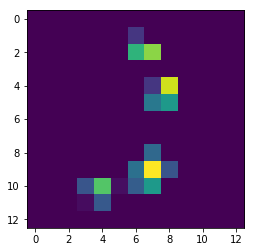

In [16]:
asd = model.features(input)
print(plt.imshow(asd[0][5].detach().numpy()))

In [10]:
asd.shape

torch.Size([1, 512, 13, 13])